# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:

The first step was a red light, which the agent did well and received 2.58 reward points. It was a long light, but at the green light, there was oncoming traffic and the agent idled and received 0.30 reward points. Going pretty well so far. The light then changed to red and the agent again idled happily and received 2.0 points. The light changed to green with no oncoming traffic and the agent didn't nothing. This time the reward points was -4.95. The agent probably just made a mistake. The sequence repeated, red light, 1.68 rewards points, green light -5.08 points. The agent is of course not programmed to move yet. That's my part of the project. The rewards lean heavily to the negative side to discourage improper or dangerous moves. This makes sense if compared to real life, where reaching the destination safely and on time is considered normal and the best outcome. And more of a long-term benefit, I live longer, I don’t get hurt, I don’t get a ticket. Each of which would be immediate and costly if they were to happen. Hence, more negative points are awarded for inappropriate choices that could lead to a “bad” outcome.

**

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:

agent.py:   enforce_deadline - set to default of False. Once set to True, it'll enforce a deadline        metric.
  
  learning - Default is set to False initially. When set to True, this will force the driving agent to use Q-learning. 
  
  display      - set to False to disable the GUI if PyGame is enabled. True then enables the simulation to be viewed. 
  
environment.py - def act(self, action): 
                    """ Consider an action and perform the action is it is legal. 
                        Receive a reward for the agent based on traffic laws. """

render_text(): This is the non-GUI render display of the simulation. Simulated trial data will be               rendered in the terminal/command prompt.

render(): This is the GUI render display of the simulation. 

It appears that the first consideration is to check if destination is cardinally East or West of present agent location.  **
**

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


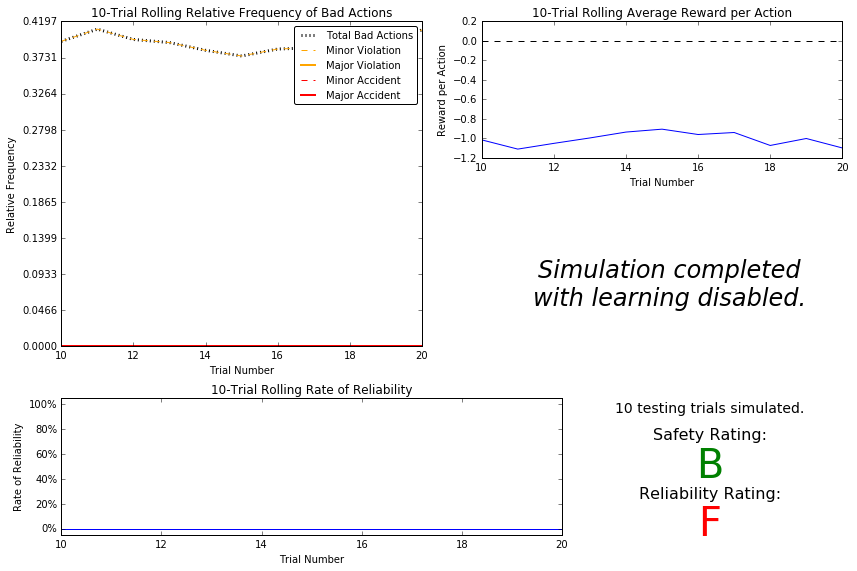

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:


     How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?

I counted through 3 trials (No. 1, 2, 6). In trial 1, 12 bad and 8 good decisions with 2 accidents.
Trial 2 resulted in 19 bad and 6 good decisions and 2 traffic accidents. And finally, trial 3 with 25 bad and 10 good decisions, but 6 traffic accidents. In total, the agent made 80 decisions, and had 10 accidents. That’s 12.5% of the time the agent is causing an accident.


     Given that the agent is driving randomly, does the rate of reliabilty make sense?

Certainly. In the first trial, 8 good decisions from 20. The second resulted in 6 good decisions from 25. Finally, 10 good from 35 total decisions. I would expect something in the neighborhood of 25% good decisions per testing trials. The first trial yielded 40%, the second resulted in 24% and the third 29%. I’ve only done 3 trials, but these numbers seem reasonable. What convinces me that there is a randomness in the driving agent is 1 in 8 steps resulted in an accident. 


     What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?

The agent is getting high negative rewards for dangerous or illegal decisions. Turning right when forward or left was appropriate actually resulted in slight ( >1) rewards points gain. However, running a redlight garners -10.43 and if an accident occurred, -40.03 was awarded. Idling at a green light with no oncoming traffic got -4.08. The highest found points awarded were for following the waypoint and garnered just 1.30. The rewards are heavily weighted to avoid making dangerous or illegal choices. 


     As the number of trials increases, does the outcome of results change significantly?

No, and this follows from the conclusion above that the agent is making random choices. 


     Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?

Not at all. 1 in 8 choices resulted in an accident. Roughly 25% improper choices were made. And in no trial did the smartcab reach the destination on time. Who would want to take a cab that won’t get you to your destination on time, drive all over running up the meter and 12% of the time get you into an accident?
**

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:

The build_state() is very important to the agent because it informs the agent of its surroundings within the simulation. The Waypoint feature gives directions to the final destination, which leads to a success when the agent arrives before the deadline. The ‘left,’ ‘right,’ 'oncoming,' and ‘light’ of the Input feature gives information about safety. Is the light red or green, are other vehicles in the vicinity and will they impact the agent’s decision concerning safety? Which was an issue in the random choice examples earlier. I am including all states within the above features. It's not that some of the states couldn't be excluded to shink the Q-State and thereby lessen the number of trials necessary to train the agent to an A+ rating. But, I've chosen not to more for the philosophical point. For instance, traffic coming from the right doesn't need to be consider, whether the light is red or green. As well, if the light is green, traffic from the left needn't be considered. If the waypoint is forward or right and the light green, none of the traffic inputs needs to be considered as the agent will have right away. So, there are quite a few scenarios within the Q-State that could be eliminated. The fact is there are few enough states that 10 or so if/else statements could pass with an A+ rating because of the simplicity of the Environment. This defeats the purpose of the project, to write code that will learn and pass the Reliability and Safety test. For this reason I am forgoing deleting states for the simplicity of the Q-State. Besides, I have a i5 chip and it took 5 min, maybe a bit more, to run the simulations. It would have taken less with fewer states, but not enough to change my mind. Side note, I could imagine with a much more complicated Q-State, say downtown SF, eliminating some states may be necessary, but then again, assumptions that people will stop at red lights could get one into an accident. So, a true learning agent that has the ability to learn that people are choatic, will run red lights, turn left even with oncoming traffic, and worse, will be a must. Until the time that agents are the only allowed drivers. 

The 'deadline' feature will be excluded. I don't want the agent to learn to change it's priorities, safety and efficiency, if the deadline approaches. Not that the environment program would reward the agent for driving through a red light. Furthermore, the 'deadline' was reached in each of the ten tests for the final agent. By learning efficiency, or following the waypoints, the agent reaped maximum rewards and reached the endpoint well within the 'deadline.' **

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:

Given the features I've chosen above, there are 384 different Q-states.

light (red, green)
oncoming (None, 'forward', 'left', 'right')
left (None, 'forward', 'left', 'right')
right (None, 'forward', 'left', 'right')
waypoint ('left', 'forward', 'right') 

A couple of ouput samples could look like: ('green', 'right', None, 'forward', 'forward') or 
('green', 'right', 'left', None, 'forward'). With the possible conditions for each of the variables of light(2), oncoming(4), left(4), right(4) and waypoint(3) and that they each are independent, giving the total number of Q-states above. And indeed, from the sim_improved_learning file from logs file, this is the total number of states.  



*

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

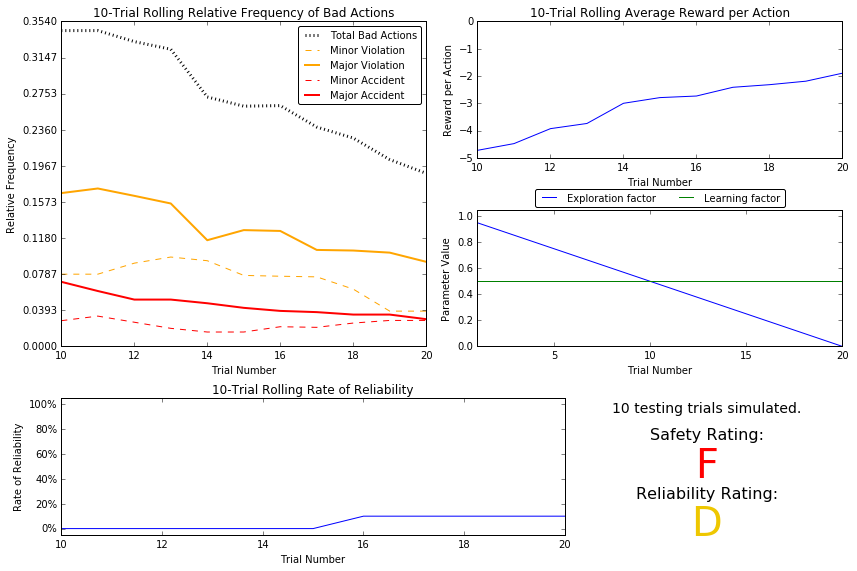

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
# vs.plot_trials('sim_default-learning.csv')
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:

No, the default agent took no actions. Whereas the learning agent, while still making wrong choices and receiving negative rewards, was still learning and slowly began taking better actions.

Considering epsilon (ϵt+1=ϵt−0.05) given for the default learning agent, 20 trials seems quite appropriate. And the negative linear graph of the epsilon decay function is also expected.

The rewards began as negative totals, like the non-learning agent, but as the agent learned to maximize the rewards during trials, the negatives became less so. And observing the above graphs, the bad actions decreased, the reliability and rewards increased as the number of trials increased. All positive signs that the agent is learning reliability and safety.

In comparing the reliability and safety between simulations, I am not at all surprised about the reliability ratings. 50% completion rate for the learning agent is a generous "D", the non-learning agent reached 0% endpoints within the deadline resulting in an "F". The safety rating was a "B" for the initial agent, but it didn't move. An "F" for the default learning agent is expected as each action is chosen until the Q-table is built with positive rewards. **

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

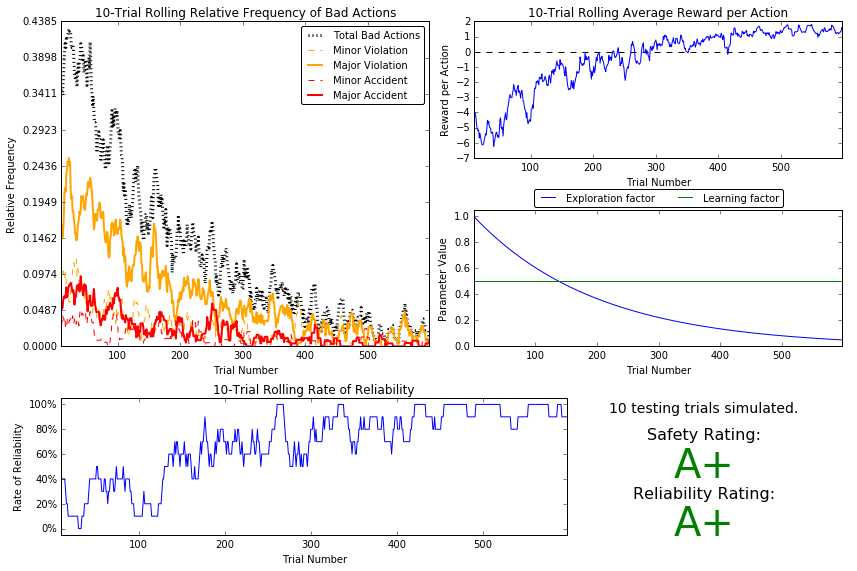

In [22]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:

In the class parameters I set self.decay = .995. I’d begun with .95 in the first learning run, but epsilon converged too quickly to .05 threshhold (in 59 trials) and the agent didn’t have enough learning instances to build a reliable and safe Q-table. My final epsilon function was straight forward, 

	self.epsilon *= self.decay.
    
With this decay rate, the agent was able to go through 598 trials before the .05 threshold was hit for testing. The last 30 trials saw only one failure to make the deadline, and all the test runs resulted in successfully reaching the destination on time and no infractions or accidents, receiving A+ for both Safety and Reliability. I could have sped up the learning, or fewer trials, but with the learning agent I built, it needed the 600 trials to fully build the Q-table that was safe and reliable. 
By the time I’d tuned the learning agent I realized that I hadn’t changed the default alpha value of 0.5, so that’s what I used throughout the tuning portion. That said, the differences between the intermediate learning agent and the final learning agent was the epsilon decay rate. But, with the rate changed from 0.95 to 0.995, the number of trials of course went up, resulting in more learning chances for the agent. These training trials brought the agent from “F” and “D” to final results of “A+” and A+” for Safety and Reliability, respectively. 

With more time I’d like to adjust the alpha and gamma variables to learn their importance to the Q-learning process within the smartcab domain. Otherwise, I am quite satisfied with the results. It took hours to finally understand the logic of the code, but once I had the first learning agent working, the tuning process took little more than an hour. The foundation was laid, of course, with those hours working out the smartcab program and how the agent related with the  environment and simulation programs. **

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:

I have pulled two samples from the agent_final.py run. The first happened about midway through the trials when epsilon was .48, so random choices are still being chosen and populating the Q-table. The was an action when the optimum choice was taken. 

State = (‘red’, None, None, None, ‘left’)  								                          
Q[State] = {None: 2.12, ‘forward’: -10.23, ‘left’: -10.30, ‘right’: 0.22}

Looking at the the state, the light was red and there was no traffic from any of the three directions, and the waypoint indicated a left turn. The Q[State] table shows that idling received the highest rewards, a ‘left’ and ‘forward’ received several negative rewards and turning ‘right’ yielded rewards of 0.22. So the agent idled appropriately and waited for the light to turn green and then went left. 
The next sample is during the testing portion when epsilon = 0. It is a ‘fail’ incidence, in this case, turning right on a green light with oncoming traffic and waypoint left. The State and Q[State] below;

State = ( ‘green’, None, ‘forward’, ‘left’, ‘left’)
Q[State] = {None: 0.0, ‘forward’: .35, ‘left’: -19.5, ‘right’: 0.5}

This didn’t result in any violations or traffic accidents, but the optimum choice would have been to idle at the light until oncoming was None. The number of training samples for this specific state was 17, I'd think enough for the optimum state to be reached. However the agent had not built a scenario where the optimum choice was made. 
** 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:
**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.